![alt text](blood-donation.jpg "Blood Donation")

# Predicting Blood Donations

<font color=red> text </font>

Introducton blurb here

# Problem Statement

Can we predict if a donor will give blood in March 2007?

# Data Dictionary

**Months since Last Donation:** this is the number of monthis since this donor's most recent donation.  
**Number of Donations:** this is the total number of donations that the donor has made.  
**Total Volume Donated:** this is the total amound of blood that the donor has donated in cubuc centimeters.  
**Months since First Donation:** this is the number of months since the donor's first donation.  
**Made Donation in March 2007:** this is our binary classifier indicating if the person made a donation in March 2007

## Load libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import merge
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 20)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# View multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Block the warnings
import sys

if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") # Change the filter in this process
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

## Load dataset

In [5]:
dataset = pd.read_csv('training.csv')

# Summarize Data
## Descriptive statistics

Let's review the shape of our training set

In [6]:
# shape
print(dataset.shape)

(576, 6)


We see that we have 576 rows and 6 columns. 

Let's now review the variable datatypes

In [7]:
# types
dataset.dtypes

Unnamed: 0                     int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

All the variables are integers.  We appear to have an ID variable as well.  Let's review the head of the dataset.

In [8]:
# head
dataset.head(10)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


Let's see some summary statistics about our variables.

In [9]:
# descriptions, change precision to 3 places
set_option('precision', 1)
dataset.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.0,576.0,576.0,576.0,576.0,576.0
mean,374.0,9.4,5.4,1356.8,34.1,0.2
std,216.9,8.2,5.7,1435.0,24.2,0.4
min,0.0,0.0,1.0,250.0,2.0,0.0
25%,183.8,2.0,2.0,500.0,16.0,0.0
50%,375.5,7.0,4.0,1000.0,28.0,0.0
75%,562.5,14.0,7.0,1750.0,49.2,0.0
max,747.0,74.0,50.0,12500.0,98.0,1.0


We need to rewiew the distribution of our class attribute. 

In [10]:
dataset['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

It appears that we have more non-donors than donors.  This class imbalance will need to be managed later.  

Now let's see if we have any missing values.

In [11]:
dataset.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

Good.  No missing values.  That makes things a little easier.  

## Data visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E0AFC55F8>,
      dtype=object)

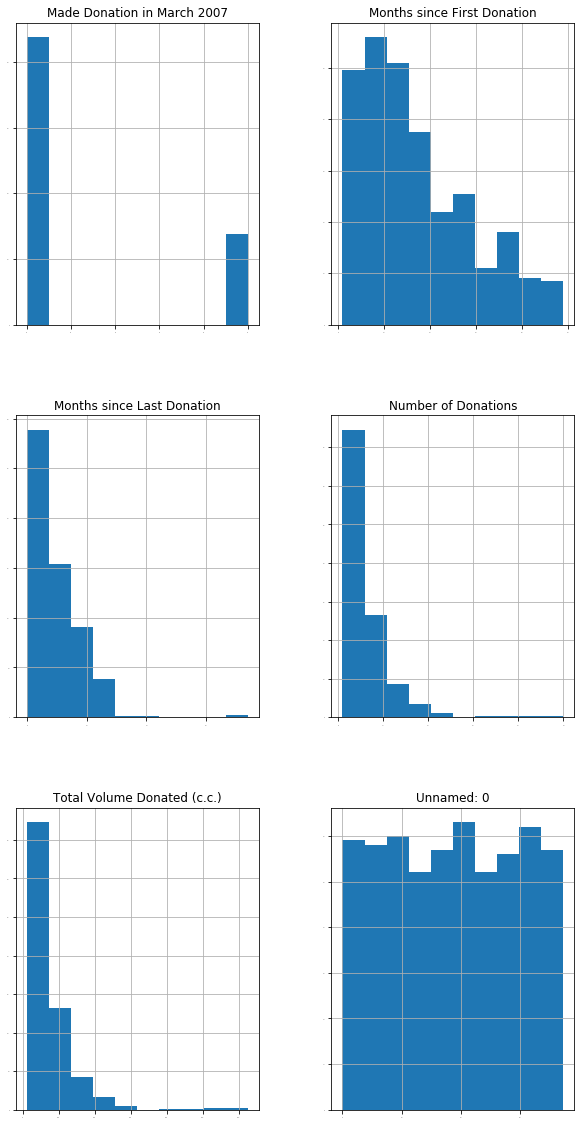

In [12]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E0B3E7F28>,
      dtype=object)

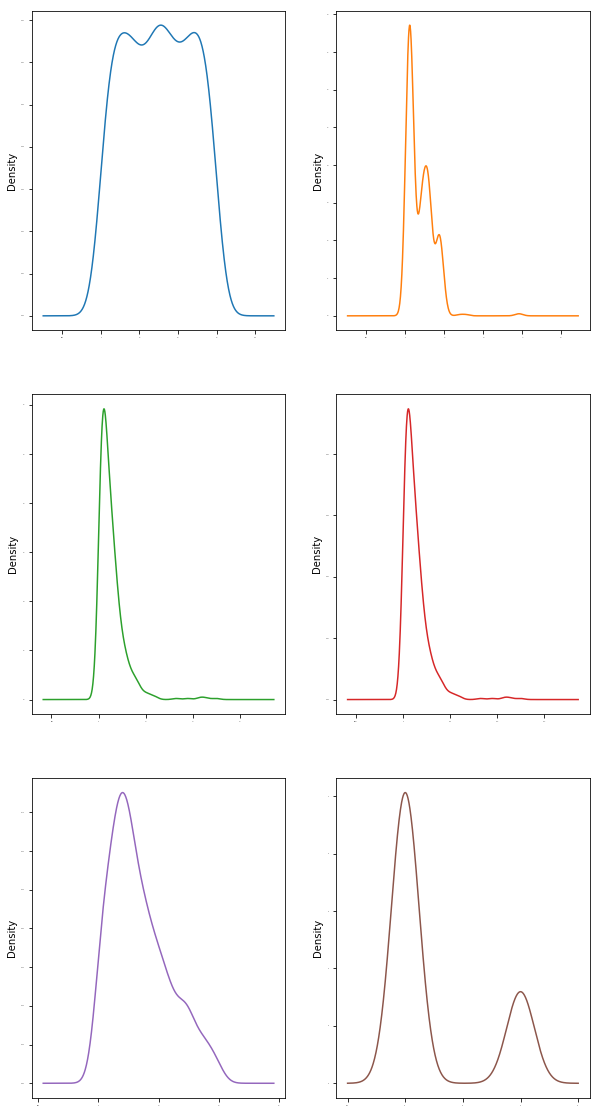

In [13]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,2), sharex=False, legend=False,
fontsize=1)
pyplot.show()

Unnamed: 0                        AxesSubplot(0.125,0.536818;0.227941x0.343182)
Months since Last Donation     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Number of Donations            AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Total Volume Donated (c.c.)          AxesSubplot(0.125,0.125;0.227941x0.343182)
Months since First Donation       AxesSubplot(0.398529,0.125;0.227941x0.343182)
Made Donation in March 2007       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

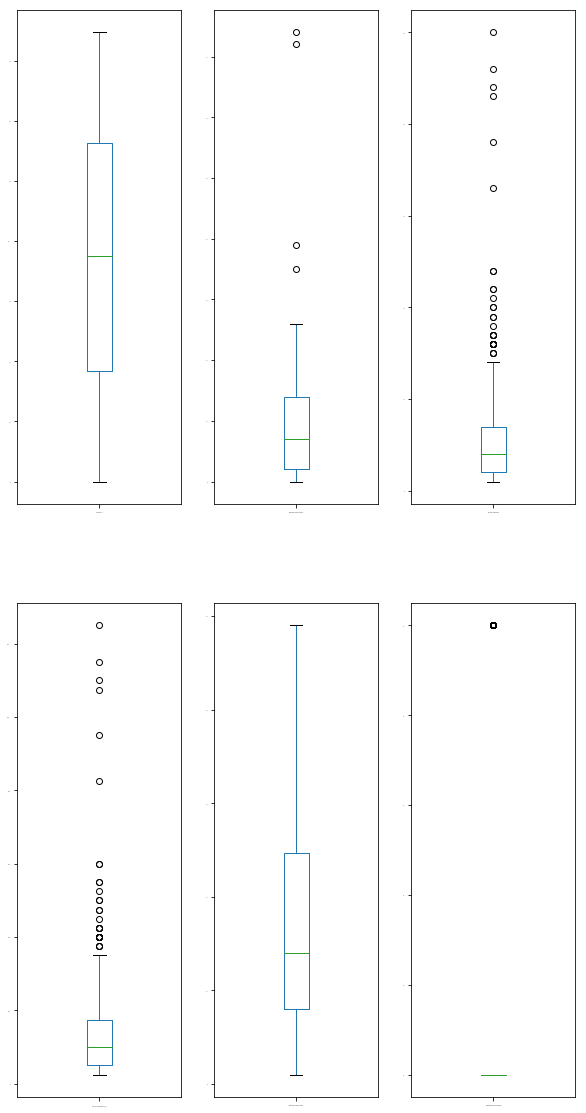

In [14]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,
fontsize=1)
pyplot.show()

# Prepare Data
## Data Cleaning

We don't have much cleaning to do.  Let's remove the ID variable only.

In [15]:
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [16]:
dataset.dtypes

Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

## Feature Selection

As we only have four variables, we won't remove any features

## Data Transformation

We have a class imbalance.  Let's use SMOTE to rebalance the class attribute

# Evaluate Algorithms
## Split-out validation dataset

In [17]:
# Split-out validation dataset
X = dataset.loc[:, dataset.columns != 'Made Donation in March 2007']
Y = dataset.loc[:, dataset.columns == 'Made Donation in March 2007']
validation_size = 0.20
seed = 100
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Rescaling the X_train values

In [18]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

## Test options and evaluation metric

We will use a 10 fold cross validation for evaluating our training data.  The evaluation metric is log loss.

In [19]:
# Test options and evaluation metric
num_folds = 10
scoring = 'neg_log_loss'

The kfold parameter will be constant for all the algorithms

In [20]:
kfold = KFold(n_splits=num_folds, random_state=seed)

## Compare Algorithms

Let's define the parameters for logistic regression. We are building out our model here to find the best parameter to use.

Let's also add the results and names to a list so that we can view them all together at the end.

In [21]:
results = []
names = []

### Logisitc Regression

In [22]:
# Define the grid parameters
param_grid = {'C': [3,2,1,0.5,0.1,0.05,0.01,0.001]}

In [23]:
# Tune scaled Logistic Regression and find the best parameter value
model = LogisticRegression(random_state=seed)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.490146 using {'C': 1}
-0.490207 (0.060224) with: {'C': 3}
-0.490181 (0.059980) with: {'C': 2}
-0.490146 (0.059281) with: {'C': 1}
-0.490230 (0.058001) with: {'C': 0.5}
-0.494482 (0.050906) with: {'C': 0.1}
-0.502406 (0.045367) with: {'C': 0.05}
-0.554734 (0.026613) with: {'C': 0.01}
-0.659619 (0.004942) with: {'C': 0.001}


In [24]:
# Fit the model with the best parameter value
best_model = LogisticRegression(C = grid_result.best_params_['C'], random_state=seed)
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('LR')

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Linear Discriminant Analysis

In [25]:
# No parameters for LDA
model = LinearDiscriminantAnalysis()
cv_results = cross_val_score(model, rescaledX, Y_train, cv=kfold, scoring=scoring)

means = cv_results.mean()
stds = cv_results.std()

print("%f (%f)" % (mean, stdev))

-0.659619 (0.004942)


In [26]:
# Fit the model with the best parameter values
best_model = LinearDiscriminantAnalysis()
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('LDA')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### K Nearest Neighbors

In [27]:
# Define the grid parameters
param_grid = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21]}

In [28]:
# Tune scaled KNN and find the best parameter value
model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.542458 using {'n_neighbors': 21}
-11.112605 (2.297164) with: {'n_neighbors': 1}
-4.302017 (1.086516) with: {'n_neighbors': 3}
-2.600993 (1.079697) with: {'n_neighbors': 5}
-1.900451 (1.180078) with: {'n_neighbors': 7}
-1.535978 (1.055485) with: {'n_neighbors': 9}
-0.838370 (0.514664) with: {'n_neighbors': 11}
-0.635144 (0.317290) with: {'n_neighbors': 13}
-0.627650 (0.313310) with: {'n_neighbors': 15}
-0.552408 (0.223910) with: {'n_neighbors': 17}
-0.545427 (0.221382) with: {'n_neighbors': 19}
-0.542458 (0.224361) with: {'n_neighbors': 21}


In [29]:
# Fit the model with the best parameter values
best_model = KNeighborsClassifier(n_neighbors = grid_result.best_params_['n_neighbors'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('KNN')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

### Decision Tree Classifier

In [30]:
# Define the grid parameters
param_grid = {'min_samples_split' : range(10,500,20),
              'max_depth': range(1,20,2),
              'max_features': [1, 2, 3, 4]}

In [31]:
# Tune scaled Decision Tree Classifier and find the best parameter value
model = DecisionTreeClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.501220 using {'max_depth': 5, 'max_features': 1, 'min_samples_split': 150}
-0.535539 (0.075286) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
-0.536327 (0.077622) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
-0.535988 (0.065127) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 50}
-0.534793 (0.069526) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 70}
-0.530799 (0.076540) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 90}
-0.551497 (0.083283) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 110}
-0.533909 (0.077550) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 130}
-0.526690 (0.075250) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 150}
-0.536743 (0.073682) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 170}
-0.536366 (0.082021) with: {'max_depth': 1, 'max_features': 1, 'min_samples_split': 190}
-0.535070 (0.076995) with: {'ma

In [32]:
# Fit the model with the best parameter values
best_model = DecisionTreeClassifier(min_samples_split = grid_result.best_params_['min_samples_split'],
                                 max_depth = grid_result.best_params_['max_depth'],
                                 max_features = grid_result.best_params_['max_features'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('DT')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=150, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Naive Bayes 

In [33]:
# No parameters for NB
model = GaussianNB()
cv_results = cross_val_score(model, rescaledX, Y_train, cv=kfold, scoring=scoring)

means = cv_results.mean()
stds = cv_results.std()

print("%f (%f)" % (mean, stdev))

-0.557778 (0.076186)


In [34]:
# Fit the model with the best parameter values
best_model = GaussianNB()
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('NB')

GaussianNB(priors=None, var_smoothing=1e-09)

### Support Vector Machines

In [35]:
# Define the grid parameters
param_grid = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
                  , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [36]:
# Tune scaled SVC and find the best parameter value
model = SVC(probability=True)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.512371 using {'C': 2.0, 'kernel': 'rbf'}
-0.531625 (0.085521) with: {'C': 0.1, 'kernel': 'linear'}
-0.617471 (0.236857) with: {'C': 0.1, 'kernel': 'poly'}
-0.525480 (0.071983) with: {'C': 0.1, 'kernel': 'rbf'}
-0.530616 (0.091048) with: {'C': 0.1, 'kernel': 'sigmoid'}
-0.530506 (0.085673) with: {'C': 0.3, 'kernel': 'linear'}
-0.617619 (0.232951) with: {'C': 0.3, 'kernel': 'poly'}
-0.524131 (0.076207) with: {'C': 0.3, 'kernel': 'rbf'}
-0.524782 (0.093883) with: {'C': 0.3, 'kernel': 'sigmoid'}
-0.527360 (0.087034) with: {'C': 0.5, 'kernel': 'linear'}
-0.581103 (0.133181) with: {'C': 0.5, 'kernel': 'poly'}
-0.522406 (0.076182) with: {'C': 0.5, 'kernel': 'rbf'}
-0.538508 (0.088602) with: {'C': 0.5, 'kernel': 'sigmoid'}
-0.523663 (0.079177) with: {'C': 0.7, 'kernel': 'linear'}
-0.591810 (0.161269) with: {'C': 0.7, 'kernel': 'poly'}
-0.521002 (0.077691) with: {'C': 0.7, 'kernel': 'rbf'}
-0.544685 (0.089578) with: {'C': 0.7, 'kernel': 'sigmoid'}
-0.527639 (0.087226) with: {'C': 0.9, 

In [37]:
# Fit the model with the best parameter values
best_model = SVC(C = grid_result.best_params_['C'], kernel = grid_result.best_params_['kernel'], probability=True)
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('SVM')

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Adaboost Classifier

In [38]:
# Define the grid parameters
param_grid = {'learning_rate': [3,2,1,0.5,0.1,0.01,0.001],
                  'n_estimators':[10,25,50,100,200]}

In [39]:
# Tune scaled ADA and find the best parameter value
model = AdaBoostClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.519526 using {'learning_rate': 0.01, 'n_estimators': 50}
-1.836116 (0.165833) with: {'learning_rate': 3, 'n_estimators': 10}
-0.613181 (0.043379) with: {'learning_rate': 3, 'n_estimators': 25}
-0.842009 (0.028851) with: {'learning_rate': 3, 'n_estimators': 50}
-0.761375 (0.014048) with: {'learning_rate': 3, 'n_estimators': 100}
-0.725691 (0.006928) with: {'learning_rate': 3, 'n_estimators': 200}
-0.697444 (0.006260) with: {'learning_rate': 2, 'n_estimators': 10}
-0.681144 (0.008669) with: {'learning_rate': 2, 'n_estimators': 25}
-0.696353 (0.005111) with: {'learning_rate': 2, 'n_estimators': 50}
-0.694667 (0.002433) with: {'learning_rate': 2, 'n_estimators': 100}
-0.693872 (0.001140) with: {'learning_rate': 2, 'n_estimators': 200}
-0.652920 (0.021620) with: {'learning_rate': 1, 'n_estimators': 10}
-0.674493 (0.006894) with: {'learning_rate': 1, 'n_estimators': 25}
-0.681514 (0.004112) with: {'learning_rate': 1, 'n_estimators': 50}
-0.686152 (0.002308) with: {'learning_rate': 1

In [40]:
# Fit the model with the best parameter values
best_model = AdaBoostClassifier(learning_rate = grid_result.best_params_['learning_rate'], 
                                n_estimators = grid_result.best_params_['n_estimators'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('AB')

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=50, random_state=None)

### Gradient Boosting Classifier

In [41]:
# Define the grid parameters
param_grid = {'learning_rate':[3,2,1,0.5,0.1,0.01,0.001],
                  'max_depth':[3,2,1,4,5,6],
                  'n_estimators':[100,200,300,50,25,10]}

In [42]:
# Tune scaled Gradient Boosting and find the best parameter value
model = GradientBoostingClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.496492 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 100}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 200}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 300}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 50}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 25}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 10}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 100}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 200}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 300}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 50}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 

In [43]:
# Fit the model with the best parameter values
best_model = GradientBoostingClassifier(learning_rate = grid_result.best_params_['learning_rate'], 
                                        n_estimators = grid_result.best_params_['n_estimators'],
                                       max_depth = grid_result.best_params_['max_depth'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('GB')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Random Forest

In [44]:
# Define the grid parameters
param_grid = {'min_samples_leaf': [1,3,5,7,9],
                  'min_samples_split':[2,3,4,5],
                  'n_estimators':[100,200,300,50,25,10]}

In [45]:
# Tune scaled Random Forest and find the best parameter value
model = RandomForestClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.493827 using {'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 100}
-1.076155 (0.469303) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-0.943897 (0.352329) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
-0.940974 (0.350310) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
-1.078873 (0.483684) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-1.548553 (0.777328) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
-2.100958 (0.645673) with: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
-0.911799 (0.359805) with: {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
-0.920679 (0.356061) with: {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
-0.917753 (0.348303) with: {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
-1.189235 (0.457276) with: {'min_samples_leaf': 

In [46]:
# Fit the model with the best parameter values
best_model = RandomForestClassifier(min_samples_leaf = grid_result.best_params_['min_samples_leaf'], 
                                    n_estimators = grid_result.best_params_['n_estimators'],
                                   min_samples_split = grid_result.best_params_['min_samples_split'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = best_model.predict_proba(rescaledValidationX)
result = log_loss(Y_validation, predictions)
results.append(result)
names.append('RF')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Overall Summary of Algorithms

In [47]:
for i in range(len(results)):
    msg = "%s: %f" % (names[i], results[i])
    print(msg)

LR: 0.475736
LDA: 0.483556
KNN: 0.763481
DT: 0.519958
NB: 0.926321
SVM: 0.468714
AB: 0.493621
GB: 0.464480
RF: 0.482318


The Gradient Boosting Classifier has the best result from all the algorithms with Support Vector Machines coming in a close second.  We will use the GB Classifier in evaluating our test set. 

# Final Model

Now that we know which model to use, we will evaluate the testset and submit to the DrivenData.org website

## Import the submission file

In [48]:
testset = pd.read_csv('test.csv')
testset_subset = testset.iloc[:,1:5]
testset_subset.head(10)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34
5,3,21,5250,42
6,4,2,500,4
7,14,1,250,14
8,23,2,500,87
9,14,4,1000,64


## Calculate prediction values for the testset

In [63]:
# Define the grid parameters
param_grid = {'learning_rate':[3,2,1,0.5,0.1,0.01,0.001],
                  'max_depth':[3,2,1,4,5,6],
                  'n_estimators':[100,200,300,50,25,10]}

In [56]:
# Fit the model with the best parameter values
model = GradientBoostingClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.496492 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 100}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 200}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 300}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 50}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 25}
-20.573459 (3.727167) with: {'learning_rate': 3, 'max_depth': 3, 'n_estimators': 10}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 100}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 200}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 300}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 2, 'n_estimators': 50}
-20.948986 (5.683291) with: {'learning_rate': 3, 'max_depth': 

In [57]:
# Fit the model with the best parameter values
best_model = GradientBoostingClassifier(learning_rate = grid_result.best_params_['learning_rate'], 
                                        n_estimators = grid_result.best_params_['n_estimators'],
                                       max_depth = grid_result.best_params_['max_depth'])
best_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledtestset_subset = scaler.transform(testset_subset)
predictions = best_model.predict_proba(testset_subset)[:, 1]
predictions


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

array([0.48192419, 0.48192419, 0.25797018, 0.48192419, 0.48192419,
       0.48192419, 0.31681892, 0.25797018, 0.31681892, 0.39148762,
       0.36863019, 0.48192419, 0.48192419, 0.25797018, 0.39148762,
       0.25797018, 0.39148762, 0.48192419, 0.48192419, 0.39148762,
       0.48192419, 0.39148762, 0.48192419, 0.25797018, 0.36863019,
       0.48192419, 0.31681892, 0.25797018, 0.36863019, 0.48192419,
       0.48192419, 0.48192419, 0.25797018, 0.48192419, 0.31681892,
       0.48192419, 0.31681892, 0.25797018, 0.39148762, 0.25797018,
       0.31681892, 0.39148762, 0.39148762, 0.39148762, 0.36863019,
       0.25797018, 0.39148762, 0.36863019, 0.25797018, 0.39148762,
       0.48192419, 0.48192419, 0.39148762, 0.39148762, 0.31681892,
       0.48192419, 0.48192419, 0.39148762, 0.39148762, 0.48192419,
       0.25797018, 0.31681892, 0.48192419, 0.48192419, 0.31681892,
       0.31681892, 0.39148762, 0.48192419, 0.48192419, 0.25797018,
       0.39148762, 0.39148762, 0.25797018, 0.25797018, 0.39148

## Import submission_format csv

In [58]:
submission_format = pd.read_csv('submission_format.csv', index_col='Unnamed: 0')
submission_format.head(10)

,Made Donation in March 2007
659,0.5
276,0.5
263,0.5
303,0.5
83,0.5
500,0.5
530,0.5
244,0.5
249,0.5
728,0.5


## Create dataframe with our prediction

In [59]:
# Create submission dataframe
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [61]:
my_submission.head(10)

,Made Donation in March 2007
659,0.5
276,0.5
263,0.3
303,0.5
83,0.5
500,0.5
530,0.3
244,0.3
249,0.3
728,0.4


## Export submission file to csv for submission to DrivenData.org

In [62]:
# Create submission CSV
my_submission.to_csv('submission.csv')

![alt text](DrivenData.jpg "DrivenData Results")

The submission to DrivenData competition shows a log loss result of 0.5778.  Not bad for a first pass.  